Ejercicio 3

Copia el siguiente código python:

In [10]:
#Código base de varios ejercicios.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict_formula(x, w, b):
    return sigmoid(w * x + b)


def loss_mae(y_true, y_pred):
    error = np.abs(np.subtract(y_true, y_pred))
    mean_error = np.sum(error) / len(y_true)

    return mean_error


def loss(x, y_true, w, b):
    y_pred = predict_formula(x, w, b)

    return loss_mae(y_true, y_pred)


def plot_loss(x, y_true, perdida_original, valor_parametro_inicial, rango, perdidas, xlabel, axes):
    axes.set_ylim(ymin=0.0, ymax=0.7)
    axes.plot(rango, perdidas)
    axes.scatter(valor_parametro_inicial, perdida_original, color="#ff0000", s=40)
    axes.set_xlabel(xlabel)
    axes.set_ylabel('loss')

    axes.vlines(x=valor_parametro_inicial, ymin=perdida_original, ymax=0.7, colors='#ff0000', linestyle="dashed")
    axes.text(valor_parametro_inicial + 0.1, 0.72, f'{xlabel}={valor_parametro_inicial:0.2f}', c="#ff0000")

    min_x = rango[np.argmin(perdidas)]
    min_y = np.min(perdidas)
    axes.vlines(x=min_x, ymin=0, ymax=min_y, colors='#00ff00', linestyle="dashed")
    axes.text(min_x + 0.1, 0.015, f'{min_x:0.2f}', c="#00ff00")


def plot_simple_metrics(axes, history, title):
    axes.plot(history, linestyle="dotted", label=f"loss :{history[-1]:.2f}", c="#003B80")

    axes.set_xlabel('Nº Épocas', fontsize=13, color="#003B80")
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))

    axes.set_ylabel('Métricas', fontsize=13, color="#003B80")
    axes.set_ylim(ymin=0, ymax=1.1)
    axes.yaxis.set_major_locator(MultipleLocator(0.1))

    axes.set_title(title)
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=2)
    axes.legend()


def plot_losses(x, y_true, w_inicial, b_inicial, subfigure):
    perdida_original = loss(x, y_true, w_inicial, b_inicial)

    subfigure.suptitle(f'loss={perdida_original:0.2f}', c="#ff0000")
    axes_w = subfigure.add_subplot(1, 2, 1)
    axes_b = subfigure.add_subplot(1, 2, 2)

    rango = np.linspace(-5, 5, 400)
    perdidas_w = []
    perdidas_b = []

    for parametro in rango:
        perdidas_w.append(loss(x, y_true, parametro, b_inicial))
        perdidas_b.append(loss(x, y_true, w_inicial, parametro))

    plot_loss(x, y_true, perdida_original, w_inicial, rango, perdidas_w, "w", axes_w)
    plot_loss(x, y_true, perdida_original, b_inicial, rango, perdidas_b, "b", axes_b)

    return perdida_original


def plot_evolucion_parametros(axes, ws, bs):
    axes.plot(ws, linestyle="solid", label="w", c="#6ABF40")
    axes.plot(bs, linestyle="solid", label="b", c="#BF9140")

    axes.set_xlabel('Nº Épocas', fontsize=13, color="#003B80")
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))

    axes.set_ylabel('Valor de los parámetros', fontsize=13, color="#003B80")
    axes.set_ylim(ymin=-5, ymax=5)
    axes.yaxis.set_major_locator(MultipleLocator(1))

    axes.set_title("Evolución de los parámetros en cada época")
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=2)
    axes.legend()


def plot_parametros(x, y_true, parametros):
    figure = plt.figure(figsize=(8, 3.5 * len(parametros)), layout='constrained')
    figure.suptitle("$y=\\frac{1}{1 + e^{-( w \\cdot x+b  )}}$")
    subfigures = figure.subfigures(nrows=len(parametros) + 1, ncols=1)

    ws = []
    bs = []
    history = []
    for index, (w, b) in enumerate(parametros):
        if (len(parametros) > 1):
            subfigure = subfigures[index]
        else:
            subfigure = subfigures

        loss = plot_losses(x, y_true, w, b, subfigure)
        ws.append(w)
        bs.append(b)
        history.append(loss)

    axes = subfigures[-1].add_subplot(1, 2, 1)
    plot_simple_metrics(axes, history, "loss")
    axes = subfigures[-1].add_subplot(1, 2, 2)
    plot_evolucion_parametros(axes, ws, bs)


def descenso_gradiente(x, y_true, learning_rate, w, b):
    h = 0.000003

    gradiente_w = (loss(x, y_true, w + h, b) - loss(x, y_true, w, b)) / h
    gradiente_b = (loss(x, y_true, w, b + h) - loss(x, y_true, w, b)) / h

    w = w - learning_rate * gradiente_w
    b = b - learning_rate * gradiente_b
    return w, b


def plot_descenso_gradiente(x, y_true, w_inicial, b_inicial, learning_rate, epochs):
    figure = plt.figure(figsize=(8, 3.5 * epochs), layout='constrained')
    figure.suptitle("$y=\\frac{1}{1 + e^{-( w \\cdot x+b  )}}$")
 
    subfigures = figure.subfigures(nrows=epochs + 1, ncols=1)
    w = w_inicial
    b = b_inicial

    ws = []
    bs = []
    history = []
    for epoch in range(epochs):
        if (epochs > 1):
            subfigure = subfigures[epoch]
        else:
            subfigure = subfigures

        loss = plot_losses(x, y_true, w, b, subfigure)
        ws.append(w)
        bs.append(b)
        history.append(loss)
        w, b = descenso_gradiente(x, y_true, learning_rate, w, b)

    axes = subfigures[-1].add_subplot(1, 2, 1)
    plot_simple_metrics(axes, history, "loss")
    axes = subfigures[-1].add_subplot(1, 2, 2)
    plot_evolucion_parametros(axes, ws, bs)

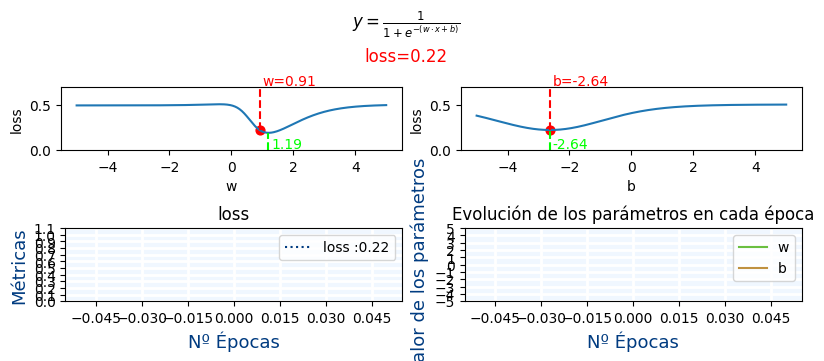

In [16]:
iris = load_iris()
x = iris.data[0:99, 2]
y_true = iris.target[0:99]

parametros = [(0.54, -1.59)]
plot_parametros(x, y_true, parametros)